In [1]:
from typing import List, Dict, Any

import re
import ast
import tiktoken
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from doraemon import Doraemon

logger = Doraemon.get_logger(name=__name__, logfile=f"efficiency_comparison.log")

gsm8k_cot='/kaggle/input/building-cots-on-gsm8k/cots_df.pkl'
math_cot='/kaggle/input/building-cots-on-math/cots_df.pkl'
coqa_cot='/kaggle/input/llama-3-building-cots-on-commonsenseqa/cots_df.pkl'
strqa_cot='/kaggle/input/deprecated-building-cots-on-strategyqa/cots_df.pkl'
hotpotqa_cot='/kaggle/input/llama-3-building-cots-on-hotpotqa/cots_df.pkl'
musique_cot='/kaggle/input/llama-3-building-cots-on-musique/cots_df.pkl'
fever_cot='/kaggle/input/llama-3-building-cots-on-fever/cots_df.pkl'

gsm8k_sot='/kaggle/input/building-gsm8k-sots-dataset/sots.pkl'
math_sot='/kaggle/input/gpt35-building-sots-on-math/sots_df.pkl'
coqa_sot='/kaggle/input/building-commonsenseqa-sots-dataset/commonsense-qa-reasoning-path.pkl'
strqa_sot='/kaggle/input/building-strategyqa-sots-dataset/strategy-qa-sots-reasoning-path.pkl'
hotpotqa_sot='/kaggle/input/building-hotpotqa-sots-dataset/sots_df.pkl'
musique_sot='/kaggle/input/building-musique-sots-dataset/musique-sots-dataset.pkl'
fever_sot='/kaggle/input/building-sot-on-fever/sots_df.pkl'

def count_tokens(text):
    return len(enc.encode(text))

def count_steps_sot(text):
    """Count steps for <think>...</think> format (SoT)."""
    if not isinstance(text, str):
        return None
    match = re.search(r'<think>(.*?)</think>', text, re.DOTALL)
    if match:
        inner = match.group(1)
        return len([seg for seg in inner.split('→') if seg.strip()])
    return None

def count_steps_cot(text):
    """Count steps for natural language CoT format."""
    if not isinstance(text, str):
        return None
    main = re.split(r'\\boxed{|\\boxed{|A:|Answer:', text)[0]
    sentences = re.split(r'(?<=[.?!])\s+', main)
    return len([s for s in sentences if s.strip()])

enc = tiktoken.encoding_for_model("gpt-3.5-turbo")  # or "gpt-4"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 9.9 MB/s eta 0:00:00


# Cot and Sot

In [2]:
df_gsm8k_cot = pd.read_pickle(gsm8k_cot)
df_gsm8k_cot['num_tokens'] = df_gsm8k_cot['cots'].apply(lambda x: count_tokens(x))
avg_tokens_gsm8k_cot = df_gsm8k_cot['num_tokens'].mean()
logger.info(avg_tokens_gsm8k_cot)

df_math_cot = pd.read_pickle(math_cot)
df_math_cot['num_tokens'] = df_math_cot['cots'].apply(lambda x: count_tokens(x))
avg_tokens_math_cot = df_math_cot['num_tokens'].mean()
logger.info(avg_tokens_math_cot)

df_coqa_cot = pd.read_pickle(coqa_cot)
df_coqa_cot['num_tokens'] = df_coqa_cot['r_s'].apply(lambda x: count_tokens(x))
avg_tokens_coqa_cot = df_coqa_cot['num_tokens'].mean()
logger.info(avg_tokens_coqa_cot)

df_strqa_cot = pd.read_pickle(strqa_cot)
df_strqa_cot['num_tokens'] = df_strqa_cot['r_s'].apply(lambda x: count_tokens(x))
avg_tokens_strqa_cot = df_strqa_cot['num_tokens'].mean()
logger.info(avg_tokens_strqa_cot)

df_hotpotqa_cot = pd.read_pickle(hotpotqa_cot)
df_hotpotqa_cot['num_tokens'] = df_hotpotqa_cot['r_s'].apply(lambda x: count_tokens(x))
avg_tokens_hotpotqa_cot = df_hotpotqa_cot['num_tokens'].mean()
logger.info(avg_tokens_hotpotqa_cot)

df_musique_cot = pd.read_pickle(musique_cot)
df_musique_cot['num_tokens'] = df_musique_cot['r_s'].apply(lambda x: count_tokens(x))
avg_tokens_musique_cot = df_musique_cot['num_tokens'].mean()
logger.info(avg_tokens_musique_cot)

df_fever_cot = pd.read_pickle(fever_cot)
df_fever_cot['num_tokens'] = df_fever_cot['r_s'].apply(lambda x: count_tokens(x))
avg_tokens_fever_cot = df_fever_cot['num_tokens'].mean()
logger.info(avg_tokens_fever_cot)
########################################################################################
df_gsm8k_sot = pd.read_pickle(gsm8k_sot)
df_gsm8k_sot = df_gsm8k_sot.drop_duplicates(subset=['question'], keep='first')
df_gsm8k_sot['num_tokens'] = df_gsm8k_sot['reason'].apply(lambda x: count_tokens(x))
avg_tokens_gsm8k_sot = df_gsm8k_sot['num_tokens'].mean()
logger.info(avg_tokens_gsm8k_sot)

df_math_sot = pd.read_pickle(math_sot)
df_math_sot = df_math_sot.drop_duplicates(subset=['query'], keep='first')
df_math_sot['num_tokens'] = df_math_sot['r_s'].apply(lambda x: count_tokens(x))
avg_tokens_math_sot = df_math_sot['num_tokens'].mean()
logger.info(avg_tokens_math_sot)

df_coqa_sot = pd.read_pickle(coqa_sot).to_pandas()
df_coqa_sot = df_coqa_sot.drop_duplicates(subset=['question'], keep='first')
df_coqa_sot['num_tokens'] = df_coqa_sot['reason'].apply(lambda x: count_tokens(x))
avg_tokens_coqa_sot = df_coqa_sot['num_tokens'].mean()
logger.info(avg_tokens_coqa_sot)

df_strqa_sot = pd.read_pickle(strqa_sot).to_pandas()
df_strqa_sot = df_strqa_sot.drop_duplicates(subset=['question'], keep='first')
df_strqa_sot['num_tokens'] = df_strqa_sot['reason'].apply(lambda x: count_tokens(x))
avg_tokens_strqa_sot = df_strqa_sot['num_tokens'].mean()
logger.info(avg_tokens_strqa_sot)

df_hotpotqa_sot = pd.read_pickle(hotpotqa_sot)
df_hotpotqa_sot = df_hotpotqa_sot.drop_duplicates(subset=['question'], keep='first')
df_hotpotqa_sot['num_tokens'] = df_hotpotqa_sot['reason'].apply(lambda x: count_tokens(x))
avg_tokens_hotpotqa_sot = df_hotpotqa_sot['num_tokens'].mean()
logger.info(avg_tokens_hotpotqa_sot)

df_musique_sot = pd.read_pickle(musique_sot).to_pandas()
df_musique_sot = df_musique_sot.drop_duplicates(subset=['question'], keep='first')
df_musique_sot['num_tokens'] = df_musique_sot['reason'].apply(lambda x: count_tokens(x))
avg_tokens_musique_sot = df_musique_sot['num_tokens'].mean()
logger.info(avg_tokens_musique_sot)

df_fever_sot = pd.read_pickle(fever_sot)
df_fever_sot = df_fever_sot.drop_duplicates(subset=['question'], keep='first')
df_fever_sot['num_tokens'] = df_fever_sot['r_s'].apply(lambda x: count_tokens(x))
avg_tokens_fever_sot = df_fever_sot['num_tokens'].mean()
logger.info(avg_tokens_fever_sot)
########################################################################################

# GSM8K
df_gsm8k_cot['cot_steps'] = df_gsm8k_cot['cots'].apply(count_steps_cot)
avg_steps_gsm8k_cot = df_gsm8k_cot['cot_steps'].mean()
logger.info(avg_steps_gsm8k_cot)

# MATH
df_math_cot['cot_steps'] = df_math_cot['cots'].apply(count_steps_cot)
avg_steps_math_cot = df_math_cot['cot_steps'].mean()
logger.info(avg_steps_math_cot)

# ComQA
df_coqa_cot['cot_steps'] = df_coqa_cot['r_s'].apply(count_steps_cot)
avg_steps_coqa_cot = df_coqa_cot['cot_steps'].mean()
logger.info(avg_steps_coqa_cot)

# StrQA
df_strqa_cot['cot_steps'] = df_strqa_cot['r_s'].apply(count_steps_cot)
avg_steps_strqa_cot = df_strqa_cot['cot_steps'].mean()
logger.info(avg_steps_strqa_cot)

# HotpotQA
df_hotpotqa_cot['cot_steps'] = df_hotpotqa_cot['r_s'].apply(count_steps_cot)
avg_steps_hotpotqa_cot = df_hotpotqa_cot['cot_steps'].mean()
logger.info(avg_steps_hotpotqa_cot)

# MuSiQue
df_musique_cot['cot_steps'] = df_musique_cot['r_s'].apply(count_steps_cot)
avg_steps_musique_cot = df_musique_cot['cot_steps'].mean()
logger.info(avg_steps_musique_cot)

# FEVER
df_fever_cot['cot_steps'] = df_fever_cot['r_s'].apply(count_steps_cot)
avg_steps_fever_cot = df_fever_cot['cot_steps'].mean()
logger.info(avg_steps_fever_cot)
########################################################################################

# GSM8K SoT
df_gsm8k_sot['num_steps'] = df_gsm8k_sot['reason'].apply(count_steps_sot)
avg_steps_gsm8k_sot = df_gsm8k_sot['num_steps'].mean()
logger.info(f"GSM8K SoT avg steps: {avg_steps_gsm8k_sot}")

# MATH SoT
df_math_sot['num_steps'] = df_math_sot['r_s'].apply(count_steps_sot)
avg_steps_math_sot = df_math_sot['num_steps'].mean()
logger.info(f"MATH SoT avg steps: {avg_steps_math_sot}")

# ComQA SoT
df_coqa_sot['num_steps'] = df_coqa_sot['reason'].apply(count_steps_sot)
avg_steps_coqa_sot = df_coqa_sot['num_steps'].mean()
logger.info(f"ComQA SoT avg steps: {avg_steps_coqa_sot}")

# StrQA SoT
df_strqa_sot['num_steps'] = df_strqa_sot['reason'].apply(count_steps_sot)
avg_steps_strqa_sot = df_strqa_sot['num_steps'].mean()
logger.info(f"StrQA SoT avg steps: {avg_steps_strqa_sot}")

# HotpotQA SoT
df_hotpotqa_sot['num_steps'] = df_hotpotqa_sot['reason'].apply(count_steps_sot)
avg_steps_hotpotqa_sot = df_hotpotqa_sot['num_steps'].mean()
logger.info(f"HotpotQA SoT avg steps: {avg_steps_hotpotqa_sot}")

# MuSiQue SoT
df_musique_sot['num_steps'] = df_musique_sot['reason'].apply(count_steps_sot)
avg_steps_musique_sot = df_musique_sot['num_steps'].mean()
logger.info(f"MuSiQue SoT avg steps: {avg_steps_musique_sot}")

# FEVER SoT
df_fever_sot['num_steps'] = df_fever_sot['r_s'].apply(count_steps_sot)
avg_steps_fever_sot = df_fever_sot['num_steps'].mean()
logger.info(f"FEVER SoT avg steps: {avg_steps_fever_sot}")

2025-07-26 08:55:36,104 INFO 158.50991477512446
2025-07-26 08:55:37,868 INFO 240.13640159599146
2025-07-26 08:55:40,632 INFO 299.95323707498835
2025-07-26 08:55:41,262 INFO 76.99952696310312
2025-07-26 08:55:43,950 INFO 266.5301460823373
2025-07-26 08:55:46,845 INFO 308.2478248666854
2025-07-26 08:55:47,816 INFO 139.97379089280665
2025-07-26 08:55:47,970 INFO 78.84787830264212
2025-07-26 08:55:48,114 INFO 102.6725
2025-07-26 08:55:49,736 INFO 32.18666666666667
2025-07-26 08:55:49,886 INFO 48.21764705882353
2025-07-26 08:55:50,012 INFO 50.68725868725869
2025-07-26 08:55:50,308 INFO 43.40133779264214
2025-07-26 08:55:50,401 INFO 45.65287162162162
2025-07-26 08:55:50,653 INFO 3.7055100835372543
2025-07-26 08:55:50,974 INFO 4.51498561751879
2025-07-26 08:55:51,629 INFO 7.115882626921286
2025-07-26 08:55:51,780 INFO 2.9655629139072848
2025-07-26 08:55:52,405 INFO 5.025498007968127
2025-07-26 08:55:53,102 INFO 5.983815137056787
2025-07-26 08:55:53,350 INFO 5.585085321014424
2025-07-26 08:55:

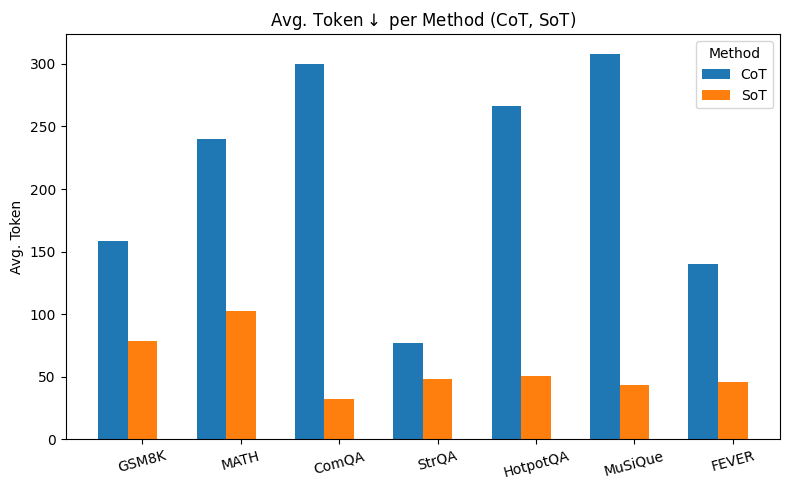

In [3]:
datasets = ['GSM8K', 'MATH', 'ComQA', 'StrQA', 'HotpotQA', 'MuSiQue', 'FEVER']
methods_plot1 = ['CoT', 'SoT']

avg_tokens_plot1 = np.array([
    [
        avg_tokens_gsm8k_cot,
        avg_tokens_math_cot,
        avg_tokens_coqa_cot,
        avg_tokens_strqa_cot,
        avg_tokens_hotpotqa_cot,
        avg_tokens_musique_cot,
        avg_tokens_fever_cot
    ],  # CoT
    [
        avg_tokens_gsm8k_sot,
        avg_tokens_math_sot,
        avg_tokens_coqa_sot,
        avg_tokens_strqa_sot,
        avg_tokens_hotpotqa_sot,
        avg_tokens_musique_sot,
        avg_tokens_fever_sot
    ],   # SoT
])

n_methods = len(methods_plot1)
x = np.arange(len(datasets))
bar_width = 0.3
colors = plt.get_cmap('tab10').colors

fig, ax = plt.subplots(figsize=(8, 5))
for i, method in enumerate(methods_plot1):
    ax.bar(x + (i - n_methods/2) * bar_width, avg_tokens_plot1[i], width=bar_width,
           color=colors[i], label=method)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=15)
ax.set_ylabel('Avg. Token')
ax.set_title('Avg. Token$\\downarrow$ per Method (CoT, SoT)')
ax.legend(title="Method")
fig.tight_layout()
fig.savefig("avg_token_sot_cot.png", dpi=300)
plt.show()

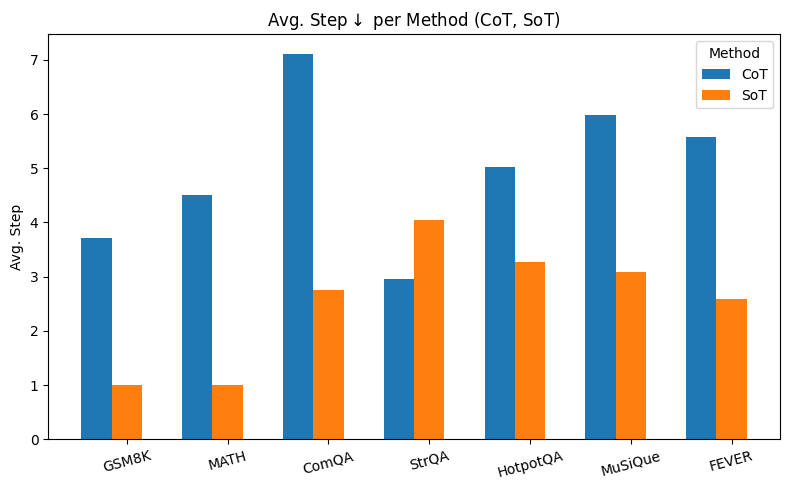

In [4]:
methods_plot1 = ['CoT', 'SoT']
avg_steps_plot1 = np.array([
    [
        avg_steps_gsm8k_cot,
        avg_steps_math_cot,
        avg_steps_coqa_cot,
        avg_steps_strqa_cot,
        avg_steps_hotpotqa_cot,
        avg_steps_musique_cot,
        avg_steps_fever_cot
    ],  # CoT

    [
        avg_steps_gsm8k_sot,
        avg_steps_math_sot,
        avg_steps_coqa_sot,
        avg_steps_strqa_sot,
        avg_steps_hotpotqa_sot,
        avg_steps_musique_sot,
        avg_steps_fever_sot
    ]  # SoT
])

n_methods = len(methods_plot1)
x = np.arange(len(datasets))
bar_width = 0.3
colors = plt.get_cmap('tab10').colors

fig, ax = plt.subplots(figsize=(8, 5))
for i, method in enumerate(methods_plot1):
    ax.bar(x + (i - n_methods/2) * bar_width, avg_steps_plot1[i], width=bar_width,
           color=colors[i], label=method)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=15)
ax.set_ylabel('Avg. Step')
ax.set_title('Avg. Step$\\downarrow$ per Method (CoT, SoT)')
ax.legend(title="Method")
fig.tight_layout()
fig.savefig("avg_steps_cot_sot.png", dpi=300)
plt.show()

# Casuality based Prompting Framework

In [5]:
decot_strqa='/kaggle/input/generate-alter-decot-on-strategyqa/alternative_decots.pkl'
deco_hotpotqa='/kaggle/input/generate-alter-decot-on-hotpotqa/alternative_decots.pkl'
decot_musiqueqa='/kaggle/input/generate-alter-decot-on-musiqueqa/alternative_decots.pkl'
decot_fever='/kaggle/input/generate-alter-decot-on-fever/alternative_decots.pkl'

# STRQA
df_decot_strqa = pd.read_pickle(decot_strqa)
df_decot_strqa['cad_tokens'] = df_decot_strqa.apply(lambda row: len(row['entities'][:2]) * row['tokens'], axis=1)
avg_tokens_decot_strqa = df_decot_strqa['cad_tokens'].mean()
logger.info(f"STRQA DeCoT avg tokens: {avg_tokens_decot_strqa}")

# HotpotQA
df_decot_hotpotqa = pd.read_pickle(deco_hotpotqa)
df_decot_hotpotqa['cad_tokens'] = df_decot_hotpotqa.apply(lambda row: len(row['entities']) * row['tokens'], axis=1)
avg_tokens_decot_hotpotqa = df_decot_hotpotqa['cad_tokens'].mean()
logger.info(f"HotpotQA DeCoT avg tokens: {avg_tokens_decot_hotpotqa}")

# MuSiQue
df_decot_musiqueqa = pd.read_pickle(decot_musiqueqa)
df_decot_musiqueqa['cad_tokens'] = df_decot_musiqueqa.apply(lambda row: len(row['entities']) * row['tokens'], axis=1)
avg_tokens_decot_musiqueqa = df_decot_musiqueqa['cad_tokens'].mean()
logger.info(f"MuSiQue DeCoT avg tokens: {avg_tokens_decot_musiqueqa}")

# FEVER
df_decot_fever = pd.read_pickle(decot_fever)
df_decot_fever['cad_tokens'] = df_decot_fever.apply(lambda row: len(row['entities']) * row['tokens'], axis=1)
avg_tokens_decot_fever = df_decot_fever['cad_tokens'].mean()
logger.info(f"FEVER DeCoT avg tokens: {avg_tokens_decot_fever}")
##############################################################################

# STRQA
df_decot_strqa['cot_steps'] = df_decot_strqa['cots'].apply(lambda x: count_steps_cot(x[0]))
avg_steps_decot_strqa = df_decot_strqa['cot_steps'].mean()
logger.info(avg_steps_decot_strqa)

# HotpotQA
df_decot_hotpotqa = pd.read_pickle(deco_hotpotqa)
df_decot_hotpotqa['cot_steps'] = df_decot_hotpotqa['cots'].apply(lambda x: count_steps_cot(x[0]))
avg_steps_decot_hotpotqa = df_decot_hotpotqa['cot_steps'].mean()
logger.info(avg_steps_decot_hotpotqa)

# MuSiQue
df_decot_musiqueqa = pd.read_pickle(decot_musiqueqa)
df_decot_musiqueqa['cot_steps'] = df_decot_musiqueqa['cots'].apply(lambda x: count_steps_cot(x[0]))
avg_steps_decot_musiqueqa = df_decot_musiqueqa['cot_steps'].mean()
logger.info(avg_steps_decot_musiqueqa)

# FEVER
df_decot_fever = pd.read_pickle(decot_fever)
df_decot_fever['cot_steps'] = df_decot_fever['cots'].apply(lambda x: count_steps_cot(x[0]))
avg_steps_decot_fever = df_decot_fever['cot_steps'].mean()
logger.info(avg_steps_decot_fever)

2025-07-26 08:55:54,843 INFO STRQA DeCoT avg tokens: 1047.2831932773108
2025-07-26 08:55:54,918 INFO HotpotQA DeCoT avg tokens: 1741.956630525438
2025-07-26 08:55:54,991 INFO MuSiQue DeCoT avg tokens: 3724.6165413533836
2025-07-26 08:55:55,062 INFO FEVER DeCoT avg tokens: 1451.3753169907015
2025-07-26 08:55:55,090 INFO 4.309243697478991
2025-07-26 08:55:55,126 INFO 3.414512093411176
2025-07-26 08:55:55,177 INFO 5.5547201336675025
2025-07-26 08:55:55,204 INFO 2.6830092983939138


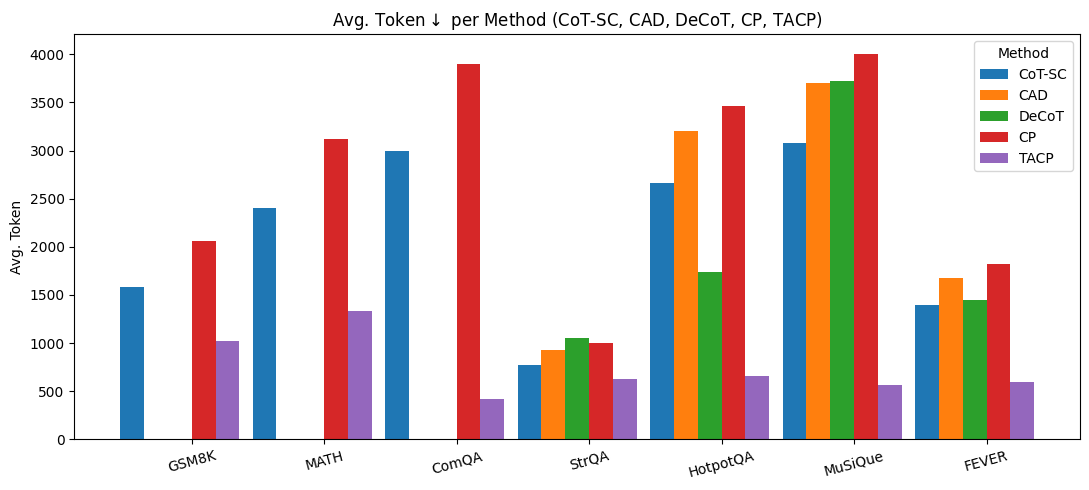

In [6]:
methods_plot2 = ['CoT-SC', 'CAD', 'DeCoT', 'CP', 'TACP']

avg_tokens_plot2 = np.array([
    # CoT-SC
    [
        10 * avg_tokens_gsm8k_cot,
        10 * avg_tokens_math_cot,
        10 * avg_tokens_coqa_cot,
        10 * avg_tokens_strqa_cot,
        10 * avg_tokens_hotpotqa_cot,
        10 * avg_tokens_musique_cot,
        10 * avg_tokens_fever_cot
    ],
    # CAD
    [
        0,
        0,
        0,
        12 * avg_tokens_strqa_cot,
        12 * avg_tokens_hotpotqa_cot,
        12 * avg_tokens_musique_cot,
        12 * avg_tokens_fever_cot
    ],
    # DeCoT
    [
        0,
        0,
        0,
        avg_tokens_decot_strqa,
        avg_tokens_decot_hotpotqa,
        avg_tokens_decot_musiqueqa,
        avg_tokens_decot_fever
    ],
    # CP
    [
        13 * avg_tokens_gsm8k_cot,
        13 * avg_tokens_math_cot,
        13 * avg_tokens_coqa_cot,
        13 * avg_tokens_strqa_cot,
        13 * avg_tokens_hotpotqa_cot,
        13 * avg_tokens_musique_cot,
        13 * avg_tokens_fever_cot
    ],
    # TACP
    [
        13 * avg_tokens_gsm8k_sot,
        13 * avg_tokens_math_sot,
        13 * avg_tokens_coqa_sot,
        13 * avg_tokens_strqa_sot,
        13 * avg_tokens_hotpotqa_sot,
        13 * avg_tokens_musique_sot,
        13 * avg_tokens_fever_sot
    ]
])


n_methods = len(methods_plot2)
x = np.arange(len(datasets))
bar_width = 0.18
colors = plt.get_cmap('tab10').colors

fig, ax = plt.subplots(figsize=(11, 5))
for i, method in enumerate(methods_plot2):
    ax.bar(x + (i - n_methods/2) * bar_width, avg_tokens_plot2[i], width=bar_width,
           color=colors[i], label=method)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=15)
ax.set_ylabel('Avg. Token')
ax.set_title('Avg. Token$\\downarrow$ per Method (CoT-SC, CAD, DeCoT, CP, TACP)')
ax.legend(title="Method")
fig.tight_layout()
fig.savefig("avg_token_casuality.png", dpi=300)
plt.show()

In [7]:
import ast

cad_on_strqa='/kaggle/input/cad-on-strategyqa/cleaned_results.pkl'
cad_on_hotpotqa='/kaggle/input/cad-on-hotpotqa/cleaned_results.pkl'
cad_on_musique='/kaggle/input/cad-on-musique/cleaned_results.pkl'
cad_on_fever='/kaggle/input/cad-on-fever/cad.pkl'

def extract_final_answer(logprobs_with_ctx):
    return ''.join(token['token'] for token in logprobs_with_ctx)

# STRQA
df_strqa_cad = pd.read_pickle(cad_on_strqa)
df_strqa_cad['final_answer'] = df_strqa_cad['logprobs_with_ctx'].apply(extract_final_answer)
df_strqa_cad['cot_steps'] = df_strqa_cad['final_answer'].apply(count_steps_cot)
strqa_cad_avg_steps = df_strqa_cad['cot_steps'].mean()
logger.info(f"STRQA CAD average steps: {strqa_cad_avg_steps:.2f}")

# MusiQue
df_musique_cad=pd.read_pickle('/kaggle/input/cad-on-musique/cleaned_results.pkl')
df_musique_cad['final_answer'] = df_musique_cad['logprobs_with_ctx'].apply(extract_final_answer)
df_musique_cad['cot_steps'] = df_musique_cad['final_answer'].apply(count_steps_cot)
musique_cad_avg_steps = df_musique_cad['cot_steps'].mean() # cad requires to get logprob with/without context
logger.info(musique_cad_avg_steps)

# Convert string to dict and extract the key (reasoning)
def extract_key_from_str_dict(x):
    try:
        d = ast.literal_eval(x)
        return list(d.keys())[0]
    except Exception as e:
        return None

# HotpotQA
df_hotpotqa_cad = pd.read_pickle(cad_on_hotpotqa)
df_hotpotqa_cad['final_answer'] = df_hotpotqa_cad['answer_with_context'].apply(extract_key_from_str_dict)
df_hotpotqa_cad['cot_steps'] = df_hotpotqa_cad['final_answer'].apply(count_steps_cot)
hotpotqa_cad_avg_steps = df_hotpotqa_cad['cot_steps'].mean()
logger.info(f"HotpotQA CAD average steps: {hotpotqa_cad_avg_steps:.2f}")

# FEVER
df_fever_cad = pd.read_pickle(cad_on_fever)
df_fever_cad['final_answer'] = df_fever_cad['answer_with_context'].apply(extract_key_from_str_dict)
df_fever_cad['cot_steps'] = df_fever_cad['final_answer'].apply(count_steps_cot)
fever_cad_avg_steps = df_fever_cad['cot_steps'].mean()
logger.info(f"FEVER CAD average steps: {fever_cad_avg_steps:.2f}")

2025-07-26 08:55:56,194 INFO STRQA CAD average steps: 4.53
2025-07-26 08:55:56,287 INFO 2.497
2025-07-26 08:55:56,364 INFO HotpotQA CAD average steps: 7.86
2025-07-26 08:55:56,398 INFO FEVER CAD average steps: 9.05


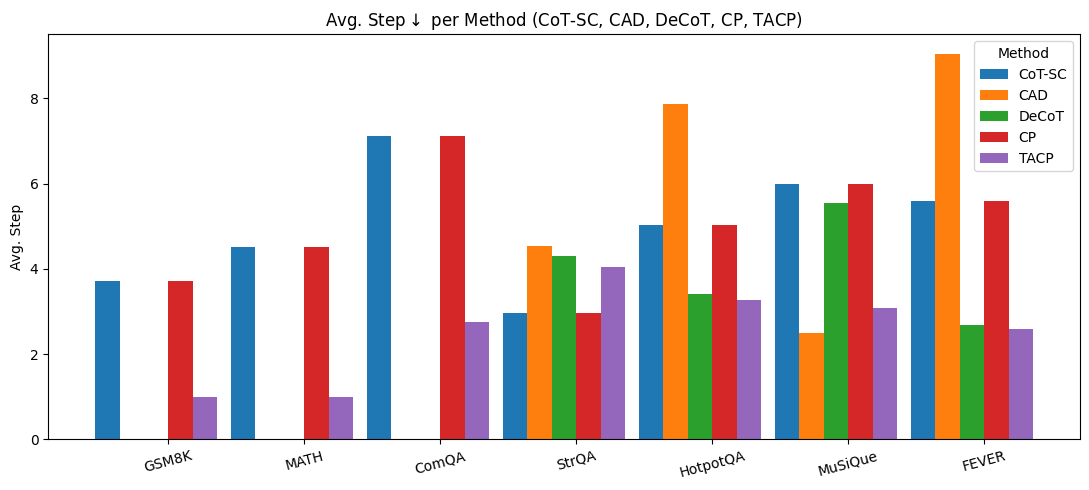

In [8]:
methods_plot2 = ['CoT-SC', 'CAD', 'DeCoT', 'CP', 'TACP']
avg_steps_plot2 = np.array([
    # CoT-SC (same as CoT)
    [
        avg_steps_gsm8k_cot,
        avg_steps_math_cot,
        avg_steps_coqa_cot,
        avg_steps_strqa_cot,
        avg_steps_hotpotqa_cot,
        avg_steps_musique_cot,
        avg_steps_fever_cot
    ],
    # CAD (same as CoT)
    [
        0,
        0,
        0,
        strqa_cad_avg_steps,
        hotpotqa_cad_avg_steps,
        musique_cad_avg_steps,
        fever_cad_avg_steps
    ],
    # DeCoT
    [
        0,
        0,
        0,
        avg_steps_decot_strqa,
        avg_steps_decot_hotpotqa,
        avg_steps_decot_musiqueqa,
        avg_steps_decot_fever
    ],
    # CP (same as CoT)
    [
        avg_steps_gsm8k_cot,
        avg_steps_math_cot,
        avg_steps_coqa_cot,
        avg_steps_strqa_cot,
        avg_steps_hotpotqa_cot,
        avg_steps_musique_cot,
        avg_steps_fever_cot
    ],
    # TACP (same as SoT)
    [
        avg_steps_gsm8k_sot,
        avg_steps_math_sot,
        avg_steps_coqa_sot,
        avg_steps_strqa_sot,
        avg_steps_hotpotqa_sot,
        avg_steps_musique_sot,
        avg_steps_fever_sot
    ]
])


n_methods = len(methods_plot2)
x = np.arange(len(datasets))
bar_width = 0.18
colors = plt.get_cmap('tab10').colors

fig, ax = plt.subplots(figsize=(11, 5))
for i, method in enumerate(methods_plot2):
    ax.bar(x + (i - n_methods/2) * bar_width, avg_steps_plot2[i], width=bar_width,
           color=colors[i], label=method)
ax.set_xticks(x)
ax.set_xticklabels(datasets, rotation=15)
ax.set_ylabel('Avg. Step')
ax.set_title('Avg. Step$\\downarrow$ per Method (CoT-SC, CAD, DeCoT, CP, TACP)')
ax.legend(title="Method")
fig.tight_layout()
fig.savefig("avg_step_casuality.png", dpi=300)
plt.show()